In [80]:
import numpy as np
import os
import re
import tifffile
import scipy.misc
from IPython.display import display
import PIL.Image
import time
%matplotlib inline

def show_fig(ar_fig, path_save=None):
    display(PIL.Image.fromarray(ar_fig))
    time.sleep(1)
    if path_save is None:
        return
    path_base = os.path.dirname(path_save)
    if not os.path.exists(path_base):
        os.makedirs(path_base)
    scipy.misc.imsave(path_save, ar_fig)

def to_uint8(ar, val_min, val_max):
    ar_new = ar.copy()
    if val_min is not None: ar_new[ar_new < val_min] = val_min
    if val_max is not None: ar_new[ar_new > val_max] = val_max
    ar_new -= np.min(ar_new)
    ar_new = ar_new/np.max(ar_new)*256.0
    ar_new[ar_new >= 256.0] = 255.0
    return ar_new.astype(np.uint8)

def add_scale_bar(img, width, um_per_pixel, color=255, thickness=5, vpad=10, hpad=10):
    """Annotate image with scale bar.
    
    img - np.array(dytpe=np.uint8)
    width - bar width in microns
    px_per_um - float
    """
    width_in_pixels = int(np.round(width/um_per_pixel))
    offset_y = img.shape[0] - thickness - vpad
    offset_x = img.shape[1] - width_in_pixels - hpad
    img[offset_y:offset_y + thickness, offset_x:offset_x + width_in_pixels] = color
    print('DEBUG:', img.dtype, img.shape, offset_y, offset_x)
    return img

In [87]:
path_source_dir = '../results_02'
paths_outputs = [i.path for i in os.scandir(path_source_dir) if i.is_dir()]
print(paths_outputs)

['../results_02/output_lamin_b1_100k_100000', '../results_02/output_TEST_00020', '../results_02/output_fibrillarin_50000', '../results_02/output_zo1_50000', '../results_02/output_fibrillarin_scale_xy_0p15_50000', '../results_02/output_sec61_beta_50000', '../results_02/output_myosin_iib_50000', '../results_02/output_lamin_b1_50000', '../results_02/output_desmoplakin_50000', '../results_02/output_alpha_tubulin_50000', '../results_02/output_membrane_50000', '../results_02/output_dic_membrane_50000', '../results_02/output_dic_lamin_b1_50000', '../results_02/output_lamin_b1_50k_50000', '../results_02/output_beta_actin_50000', '../results_02/output_dna_50000', '../results_02/output_tom20_50000']


z_indices: [26 21 16 10  5]
img_test_00_prediction.tif
(32, 224, 320) float32 -1.27347 7.56164
img_test_00_signal.tif
(32, 224, 320) float32 -9.90909 20.1578
DEBUG: uint8 (224, 320) 209 243
scale added
img_test_00_target.tif
(32, 224, 320) float32 -1.7267 16.3537


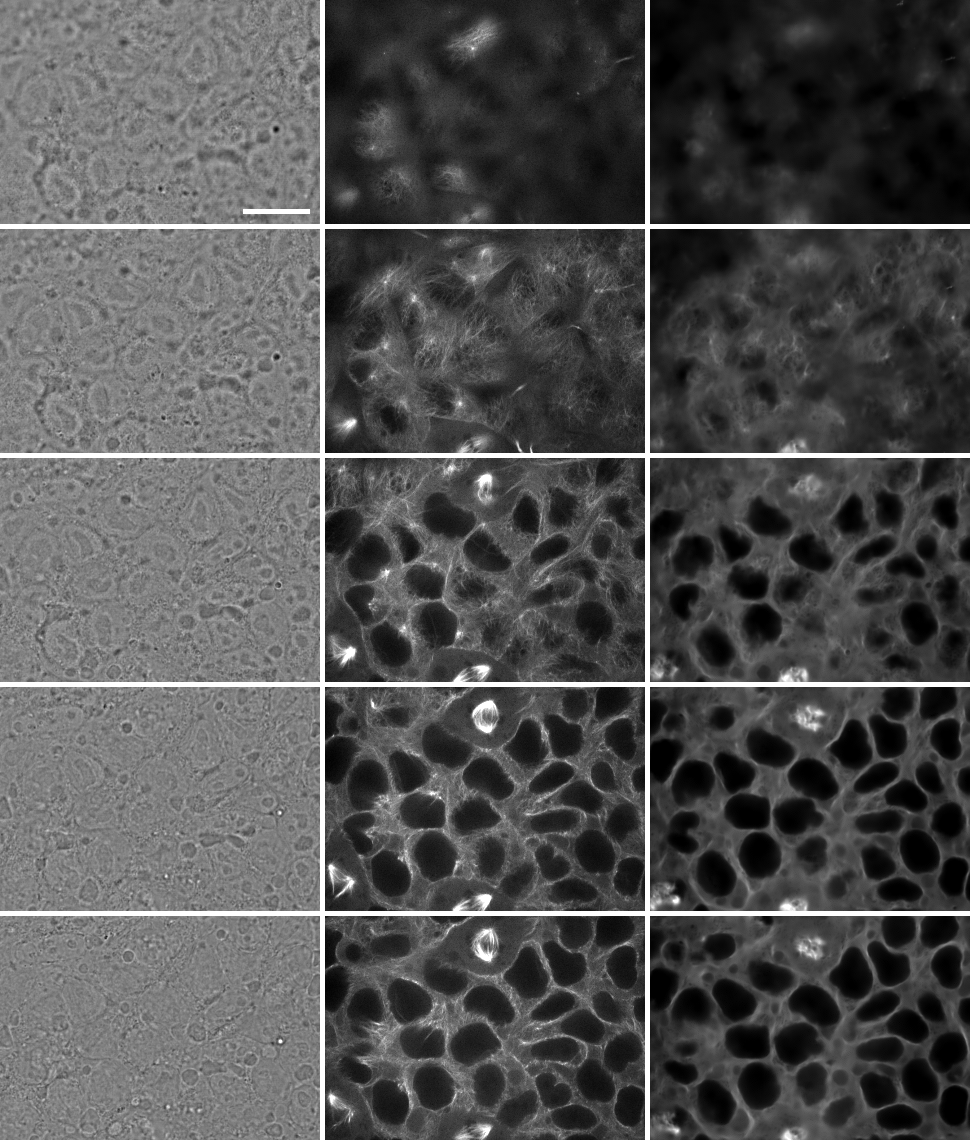

img_test_01_prediction.tif
(32, 224, 320) float32 -1.37569 6.5063
img_test_01_signal.tif
(32, 224, 320) float32 -7.03746 17.8788
DEBUG: uint8 (224, 320) 209 243
scale added
img_test_01_target.tif
(32, 224, 320) float32 -2.07807 14.7483


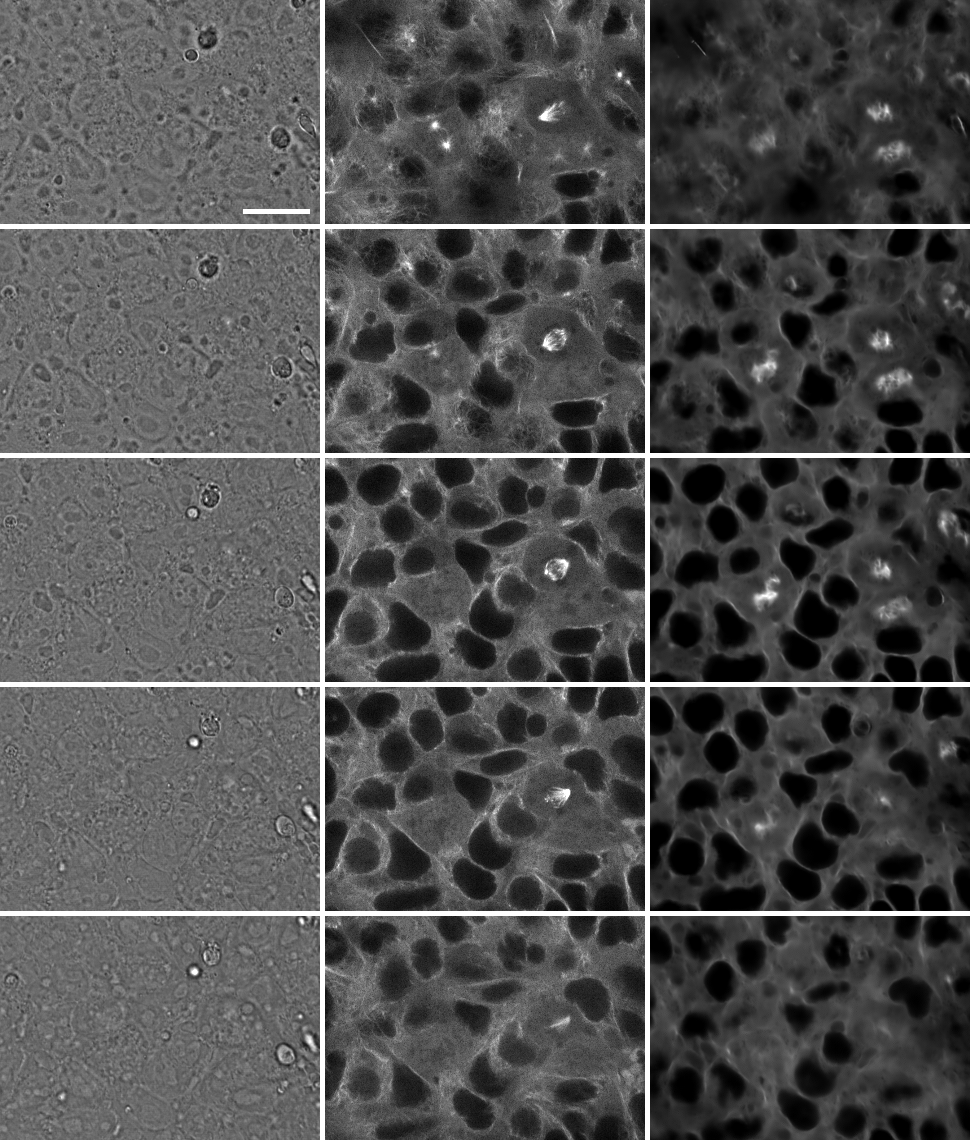

img_test_02_prediction.tif
(32, 224, 320) float32 -1.32962 4.39385
img_test_02_signal.tif
(32, 224, 320) float32 -7.58536 6.00694
DEBUG: uint8 (224, 320) 209 243
scale added
img_test_02_target.tif
(32, 224, 320) float32 -1.95704 15.7388


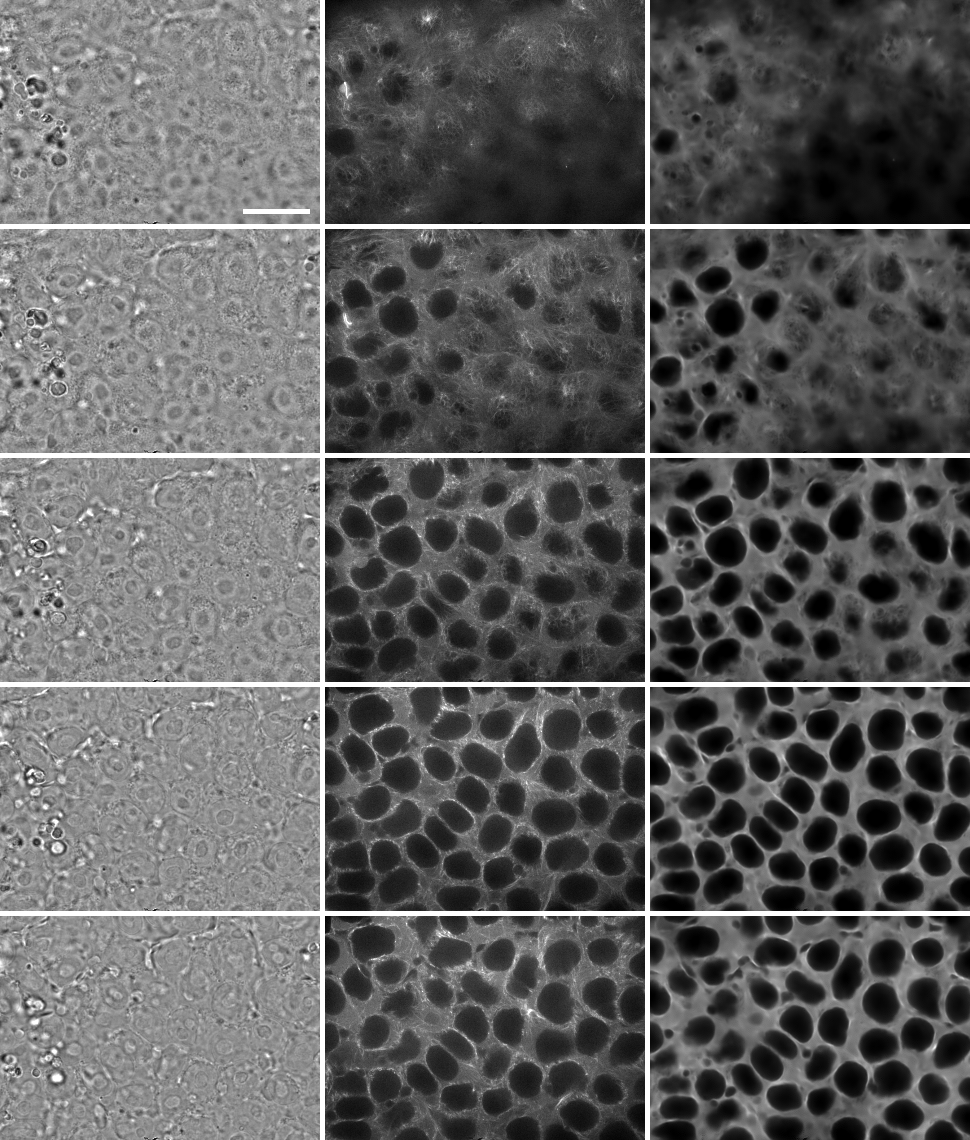

img_test_03_prediction.tif
(32, 224, 320) float32 -1.37739 3.64923
img_test_03_signal.tif
(32, 224, 320) float32 -7.45521 5.83399
DEBUG: uint8 (224, 320) 209 243
scale added
img_test_03_target.tif
(32, 224, 320) float32 -2.32974 13.9986


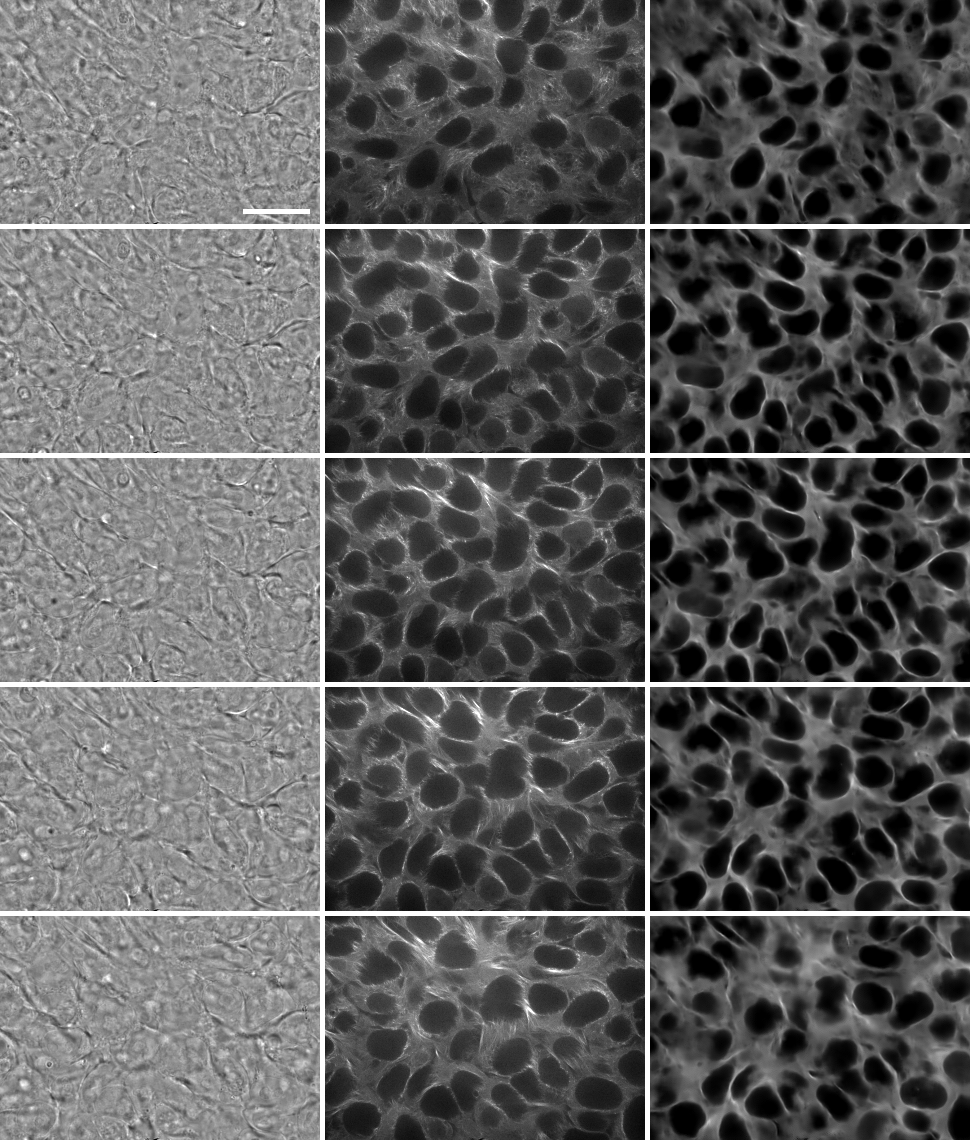

img_test_04_prediction.tif
(32, 224, 320) float32 -1.05923 3.99624
img_test_04_signal.tif
(32, 224, 320) float32 -8.33928 10.3757
DEBUG: uint8 (224, 320) 209 243
scale added
img_test_04_target.tif
(32, 224, 320) float32 -1.78408 15.901


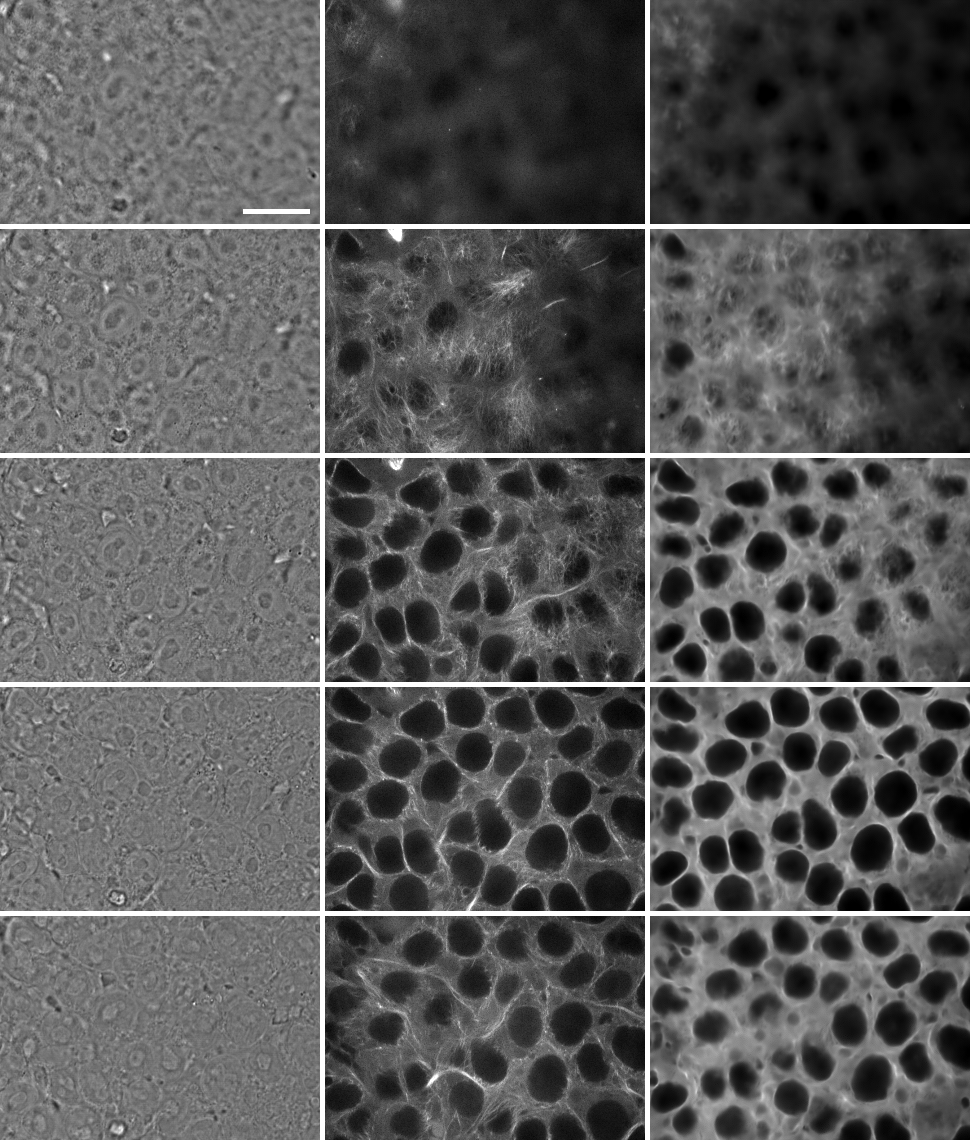

img_test_05_prediction.tif
(32, 224, 320) float32 -1.32008 3.54124
img_test_05_signal.tif
(32, 224, 320) float32 -10.1204 13.7096
DEBUG: uint8 (224, 320) 209 243
scale added
img_test_05_target.tif
(32, 224, 320) float32 -1.77993 9.41511


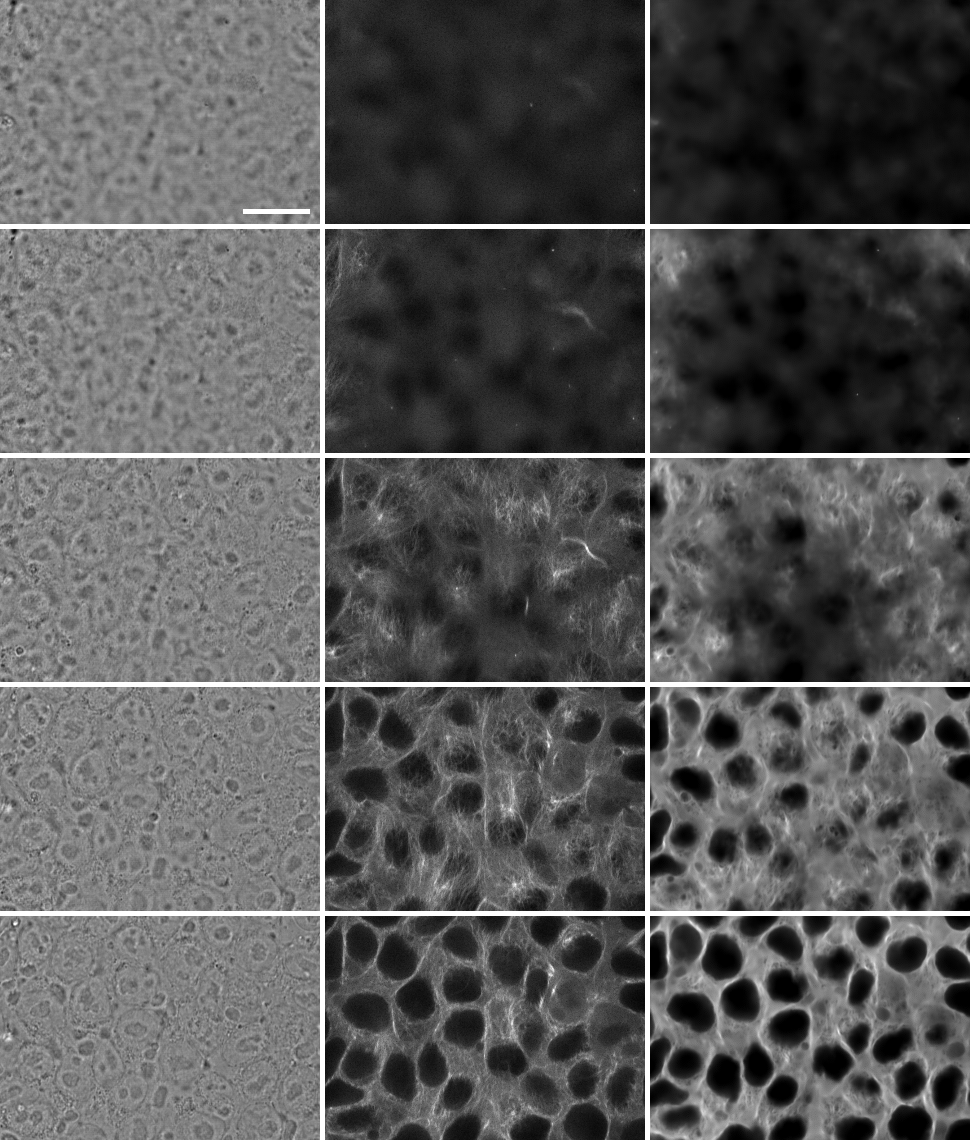

img_test_06_prediction.tif
(32, 224, 320) float32 -1.4455 3.6993
img_test_06_signal.tif
(32, 224, 320) float32 -7.02456 12.1257
DEBUG: uint8 (224, 320) 209 243
scale added
img_test_06_target.tif
(32, 224, 320) float32 -1.73925 8.84682


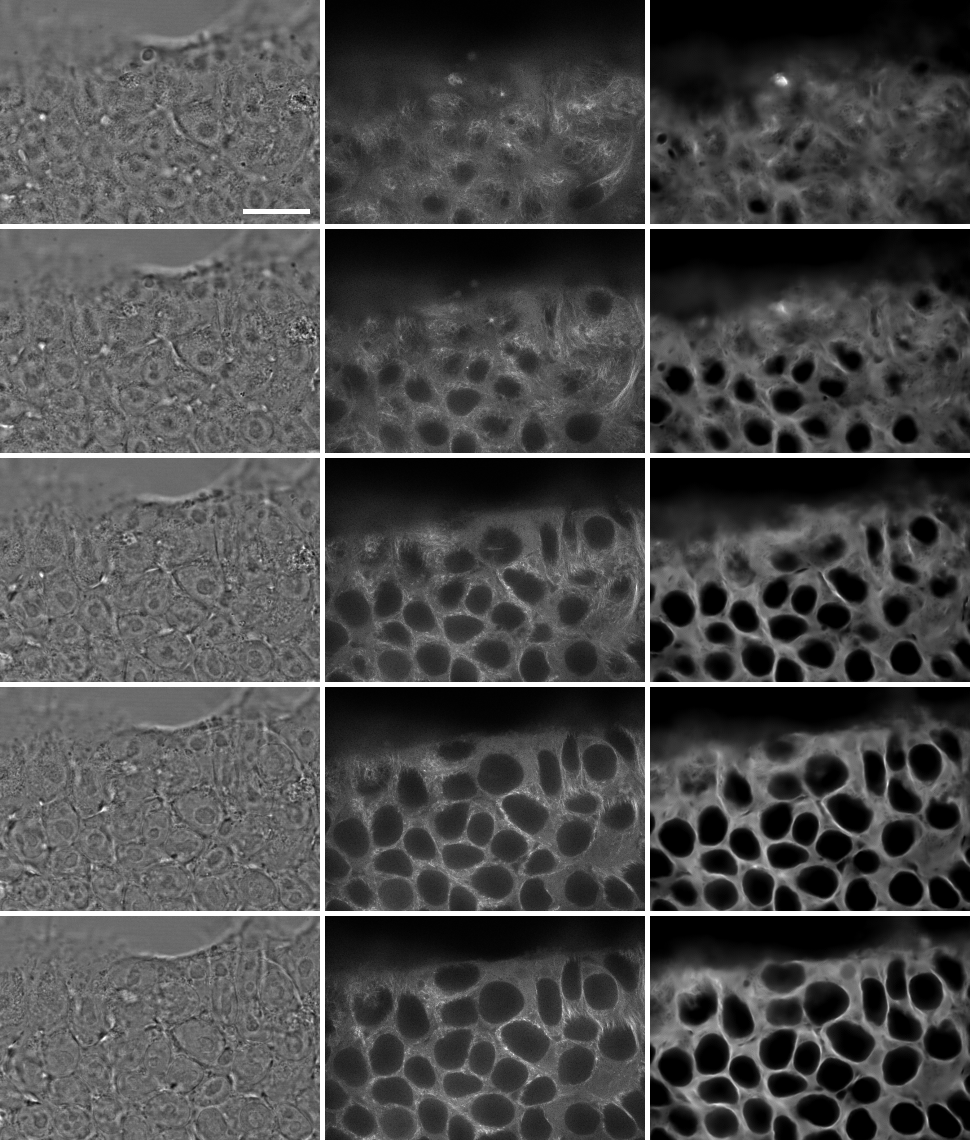

img_test_07_prediction.tif
(32, 224, 320) float32 -1.4096 7.78623
img_test_07_signal.tif
(32, 224, 320) float32 -8.89441 11.4439
DEBUG: uint8 (224, 320) 209 243
scale added
img_test_07_target.tif
(32, 224, 320) float32 -1.98028 17.8526


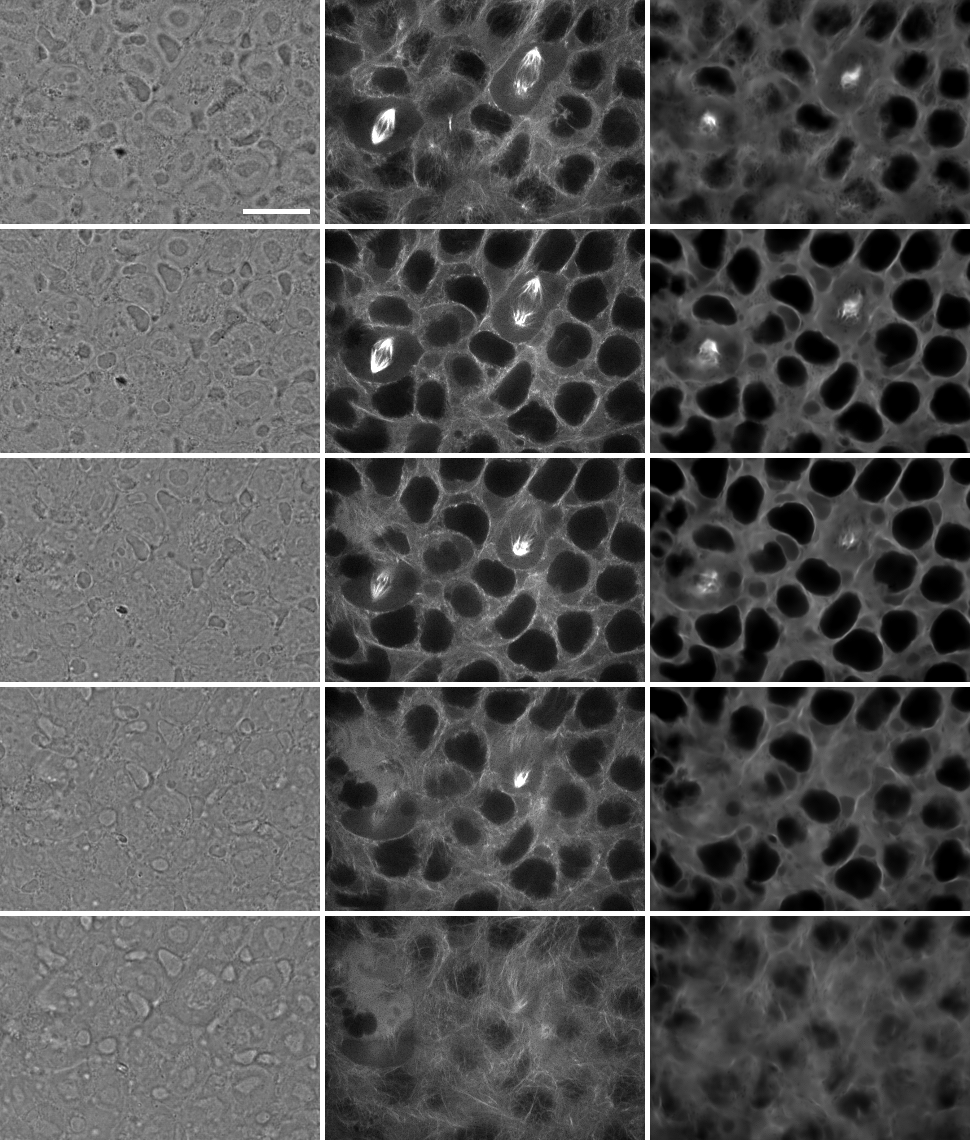

img_test_08_prediction.tif
(32, 224, 320) float32 -1.35997 5.2537
img_test_08_signal.tif
(32, 224, 320) float32 -8.73912 13.3649
DEBUG: uint8 (224, 320) 209 243
scale added
img_test_08_target.tif
(32, 224, 320) float32 -1.88719 8.59271


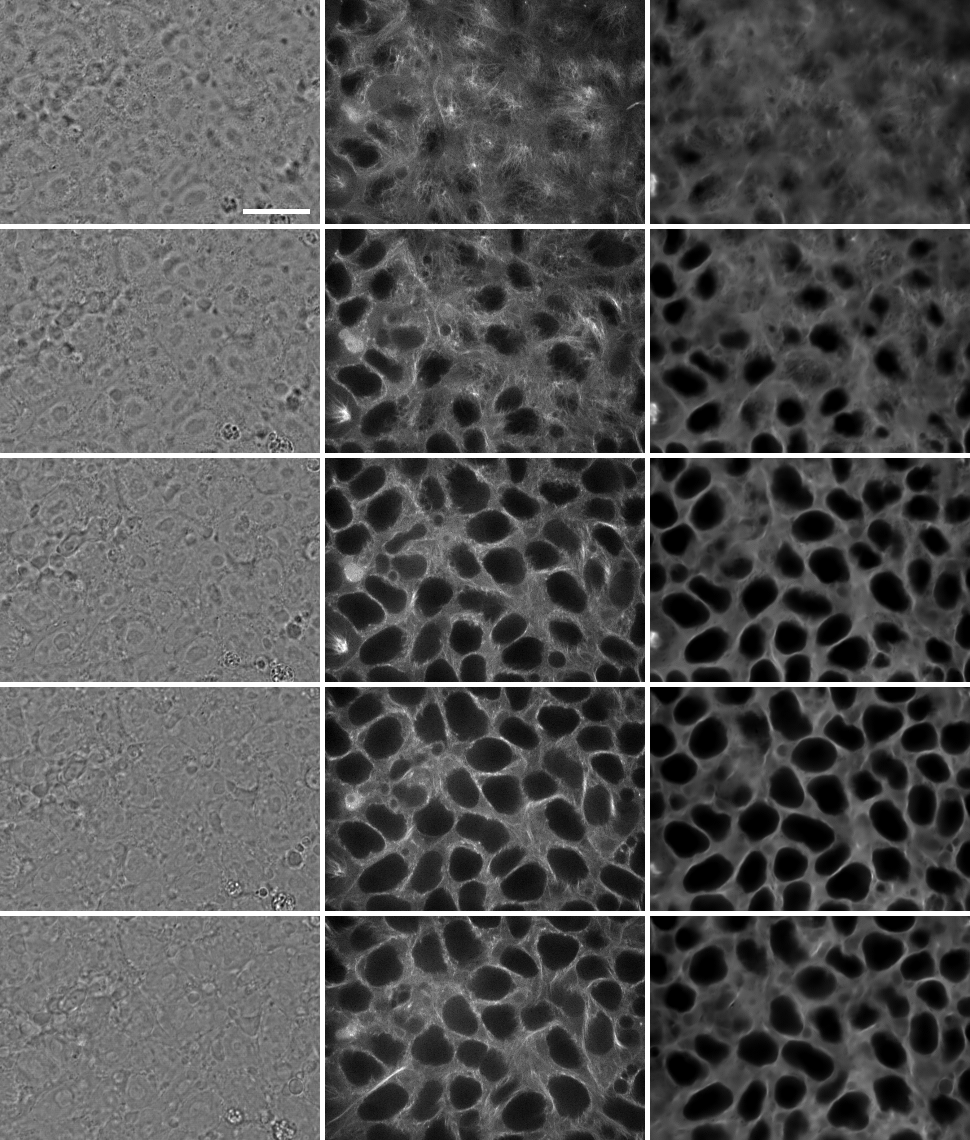

img_test_09_prediction.tif
(32, 224, 320) float32 -1.63995 3.83804
img_test_09_signal.tif
(32, 224, 320) float32 -10.2611 8.40738
DEBUG: uint8 (224, 320) 209 243
scale added
img_test_09_target.tif
(32, 224, 320) float32 -1.85137 9.64651


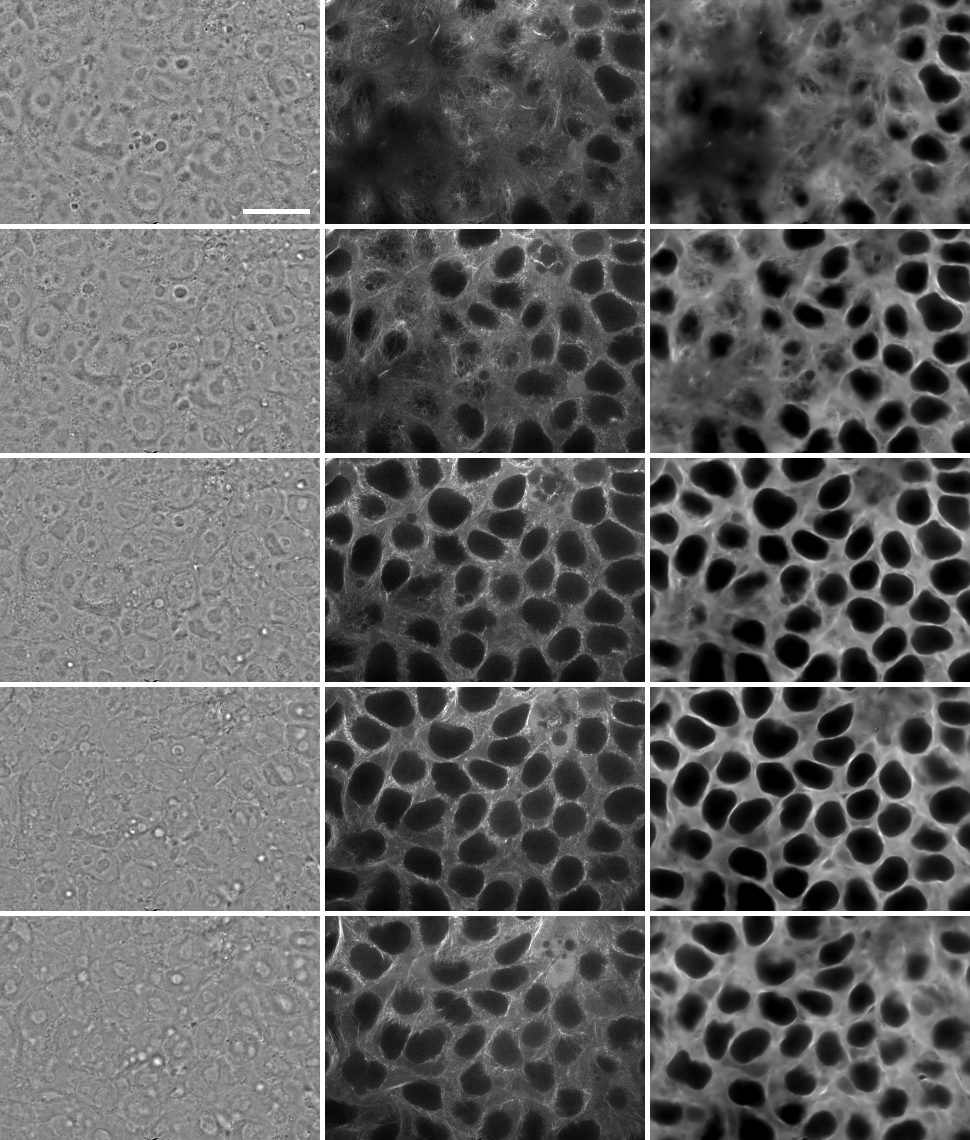

In [81]:
path_source = '../results_02/output_alpha_tubulin_50000'
path_save_dir = '../fnet_paper/example_predictions'

tags_signal = ['signal', 'bright']
tags_target = ['target', 'DNA']
tags_prediction = ['prediction']

paths_tifs = sorted([i.path for i in os.scandir(path_source) if i.is_file() and i.path.lower().endswith('.tif')])
pattern = re.compile(r'.+_test_(\d+)_')

n_images = 1
n_z_per_img = 5
padding_h = 5
padding_v = 5
shape_z = 32

val_range_signal = (-10, 10)
#val_range_target = (-3, 8)
#val_range_prediction = (-1, 5)
val_range_target = (-3, 7)
val_range_prediction = (-0.9, 6)

z_indices = [int((i + 1)*(shape_z/(n_z_per_img + 1))) for i in range(n_z_per_img)]

z_indices = np.flip(z_indices, axis=0)
print('z_indices:', z_indices)

idx_old = None
scale_added = False
count_images = 0
for i, path in enumerate(paths_tifs):
    idx_col = None
    path_basename = os.path.basename(path)
    print(path_basename)
    match = pattern.search(path_basename)
    idx_img = match.groups()[0]
    if any(tag in path_basename for tag in tags_signal):
        idx_col = 0
        val_min, val_max = val_range_signal
    if any(tag in path_basename for tag in tags_target):
        idx_col = 1
        val_min, val_max = val_range_target
    if any(tag in path_basename for tag in tags_prediction):
        idx_col = 2
        val_min, val_max = val_range_prediction
    if idx_col is not None:
        ar_pre = tifffile.imread(path)
        print(ar_pre.shape, ar_pre.dtype, np.min(ar_pre), np.max(ar_pre))
        ar = to_uint8(ar_pre, val_min, val_max)       
        if idx_img != idx_old:
            n_cols_done = 0
            idx_old = idx_img
            shape = (ar.shape[1]*n_z_per_img + (n_z_per_img - 1)*padding_h, ar.shape[2]*3 + 2*padding_v)
            ar_fig = np.ones(shape, dtype=np.uint8)*255
        offset_x = idx_col*(ar.shape[2] + padding_v)
        for idx_row, z_index in enumerate(z_indices):
            offset_y = idx_row*(ar.shape[1] + padding_h)
            img = ar[z_index, ].copy()
            if (idx_col, idx_row) == (0, 0):
                add_scale_bar(img, 20, 0.3)
                print('scale added')
            ar_fig[offset_y:offset_y + ar.shape[1], offset_x:offset_x + ar.shape[2]] = img
        n_cols_done += 1
        if n_cols_done == 3:
            name_set = os.path.basename(os.path.dirname(path))
            path_save = os.path.join(
                path_save_dir,
                name_set,
                match.group() + 'layout.png',
            )
            show_fig(ar_fig, path_save)
            count_images += 1
    if count_images >= n_images:
        break

In [33]:
np.flip(z_indices, axis=0)

array([26, 21, 16, 10,  5])